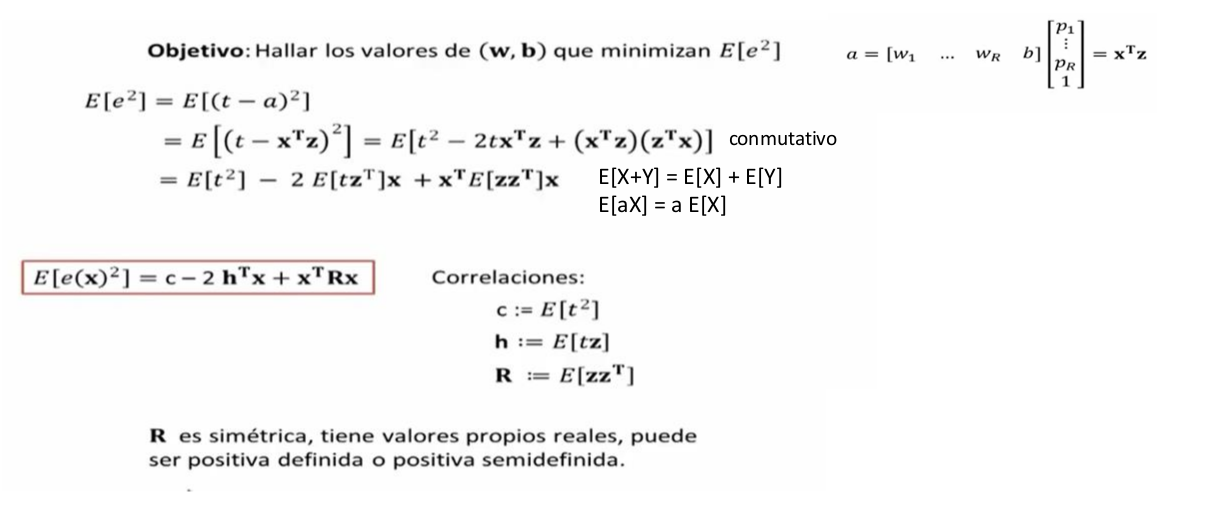

In [8]:
def fit(X, P):
    nsamples = np.shape(X)[0] ### 
    n_features = np.shape(X)[1] ### rows
    n_outputs = np.shape(P)[1] ## columns
    
    q = nsamples
    
    z = []
    for i in range(nsamples):
        X[i].append(1)
        p_i = np.array(X[i]).reshape(n_features+1,1)
        z.append(p_i)

    zzt = np.zeros((n_features+1,n_features+1))

    for vector_col in z:
        zzt += np.matmul(vector_col, np.transpose(vector_col))

    R = (1/q)*(zzt)
    
    tz = np.zeros((n_features+1, n_outputs))
    
    for i in range(nsamples):
        tz += z[i]*np.transpose(np.array(P[i]))
    
    h = (1/q)*(tz)

    if np.linalg.det(R)!=0:
        print('la matriz R es invertible')
        x = np.matmul(np.linalg.inv(R),h)
    elif  np.linalg.det(R)==0 :
        print('la matriz R no es invertible, usando la pseudo inversa')
        x = np.matmul(np.linalg.pinv(R),h)
        

    return R, h, x

# OR

In [9]:
import numpy as np

patrones_de_prueba = ([[-1,-1],
              [-1,1],
              [1,1],
              [1,-1] ])
patrones_de_prueba

[[-1, -1], [-1, 1], [1, 1], [1, -1]]

In [10]:
target = [[-1],[1],[1],[1]]

In [11]:
R_or, h_or, x_or = fit(patrones_de_prueba, target)

la matriz R es invertible


In [12]:
x_or

array([[0.5],
       [0.5],
       [0.5]])

In [13]:
np.where(((x_or[0]*-1) + (x_or[1]*1) +x_or[2])>=0,1,-1)

array([1])

In [14]:
m = x_or[0]/x_or[1]
b = (x_or[2] / x_or[1])

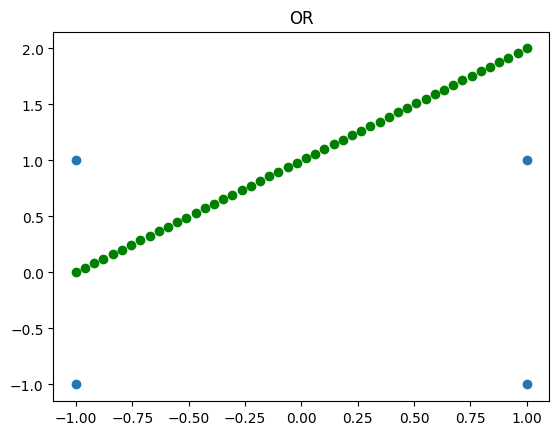

In [15]:
import matplotlib.pyplot as plt
plt.scatter(np.linspace(-1,1), [m*x+b for x in np.linspace(-1,1)], color = 'green')
plt.scatter(np.array(patrones_de_prueba)[:, 0], np.array(patrones_de_prueba)[:, 1])
plt.title('OR')
plt.show()

# AND

In [16]:
import numpy as np

patrones_de_prueba = ([[-1,-1],
              [-1,1],
              [1,1],
              [1,-1] ])
patrones_de_prueba

[[-1, -1], [-1, 1], [1, 1], [1, -1]]

In [17]:
target = [[-1],[-1],[1],[-1]]

In [18]:
R_and, h_and, x_and = fit(patrones_de_prueba, target)

la matriz R es invertible


In [19]:
x_and

array([[ 0.5],
       [ 0.5],
       [-0.5]])

In [20]:
np.where(((x_and[0]*-1) + (x_and[1]*1) +x_and[2])>=0,1,-1)

array([-1])

In [21]:
m = x_and[0]/x_and[1]
b = (x_and[2] / x_and[1])

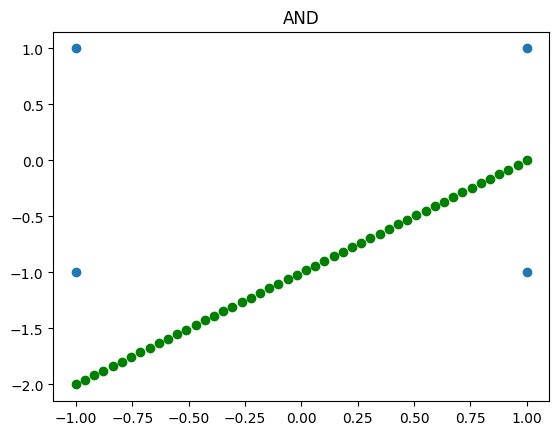

In [22]:
import matplotlib.pyplot as plt
plt.scatter(np.linspace(-1,1), [m*x+b for x in np.linspace(-1,1)], color = 'green')
plt.scatter(np.array(patrones_de_prueba)[:, 0], np.array(patrones_de_prueba)[:, 1])
plt.title('AND')
plt.show()

# XOR

In [23]:
import numpy as np

patrones_de_prueba = ([[-1,-1],
              [-1,1],
              [1,1],
              [1,-1] ])
patrones_de_prueba

[[-1, -1], [-1, 1], [1, 1], [1, -1]]

In [24]:
target = [[-1],[1],[1],[-1]]

In [25]:
R_xor, h_xor, x_xor = fit(patrones_de_prueba, target)

la matriz R es invertible


In [26]:
R_xor

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [27]:
h_xor

array([[0.],
       [1.],
       [0.]])

In [28]:
x_xor

array([[0.],
       [1.],
       [0.]])

In [29]:
np.where(((x_xor[0]*-1) + (x_xor[1]*-1) +x_xor[2])>=0,1,-1)

array([-1])

In [30]:
m = x_xor[0]/x_xor[1]
b = (x_xor[2] / x_xor[1])

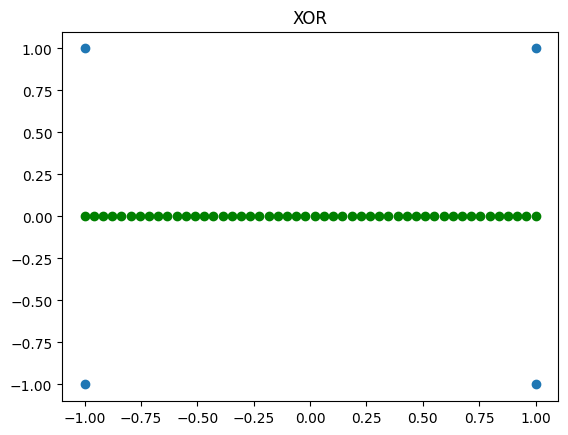

In [31]:
import matplotlib.pyplot as plt
plt.scatter(np.linspace(-1,1), [m*x+b for x in np.linspace(-1,1)], color = 'green')
plt.scatter(np.array(patrones_de_prueba)[:, 0], np.array(patrones_de_prueba)[:, 1])
plt.title('XOR')
plt.show()

# Bibliotecario

In [32]:
import numpy as np

In [33]:
patrones_de_prueba =  ([[0.73, 3],
              [1.5 , 5] ,
              [2.0 , 9 ],
              [0.9 , 11] ,
              [4.2 , 0 ],
             [2.2 , 1],
             [3.6 , 7],
           [4.5 , 6]])

In [34]:
target = ([[-1 , -1],
             [-1 , -1],
           [-1 , 1],
         [-1 , 1],
         [1 , -1],
           [1 , -1],
       [1 , 1],
        [1 , 1]])

In [35]:
R_bib, h_bib, x_bib = fit(patrones_de_prueba, target)

la matriz R es invertible


In [36]:
x_bib

array([[ 0.56391198,  0.35854109],
       [-0.07644241,  0.27554831],
       [-0.9823764 , -2.32639883]])

In [37]:
x_bib[1][0]

-0.07644240538624425

In [38]:
m1 = x_bib[0][0]/x_bib[1][0]
b1 = (x_bib[2][0]  / x_bib[1][0])

In [39]:
m2 = x_bib[0][1]/x_bib[1][1]
b2 = (x_bib[2][1]  / x_bib[1][1])

In [40]:
np.where(((x_bib[0]*2) + (x_bib[1]*9) +x_bib[2])>=0,1,-1)

array([-1,  1])

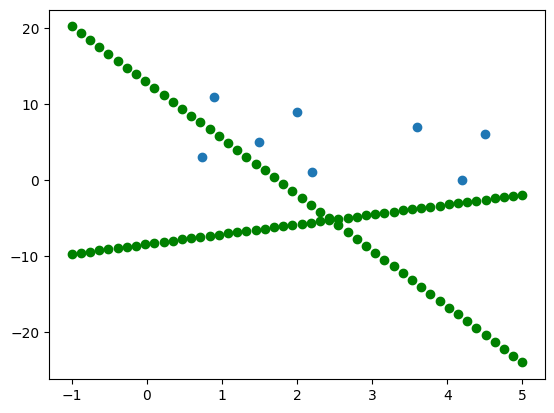

In [41]:
import matplotlib.pyplot as plt

plt.scatter(np.linspace(-1,5), [m2*x+b2 for x in np.linspace(-1,5)], color = 'green')
plt.scatter(np.array(patrones_de_prueba)[:, 0], np.array(patrones_de_prueba)[:, 1])
plt.scatter(np.linspace(-1,5), [m1*x+b1 for x in np.linspace(-1,5)], color = 'green')
#plt.title('XOR')
plt.show()

# 7 segmentos pares

In [45]:
import numpy as np
patrones_de_prueba =  ([[1,1,0,1,1,0,1],
              [0,1,1,0,0,1,1] ,
              [1,0,1,1,1,1,1],
              [1,1,1,1,0,1,1]])

In [46]:
target = ([[1,-1,1],
             [1 ,-1,-1],
           [1,1, -1],
         [1,1,-1]])

In [47]:
R_bib, h_bib, x_bib = fit(patrones_de_prueba, target)

la matriz R no es invertible, usando la pseudo inversa


In [ ]:
#np.where(((x_xor[0]*-1) + (x_xor[1]*-1) +x_xor[2])>=0,1,-1)